In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

fig_size = (12, 8)
fig_dpi = 120

In [2]:
data = loadmat('./data/ex7data1.mat')
x = data.get('X')
x.shape

(50, 2)

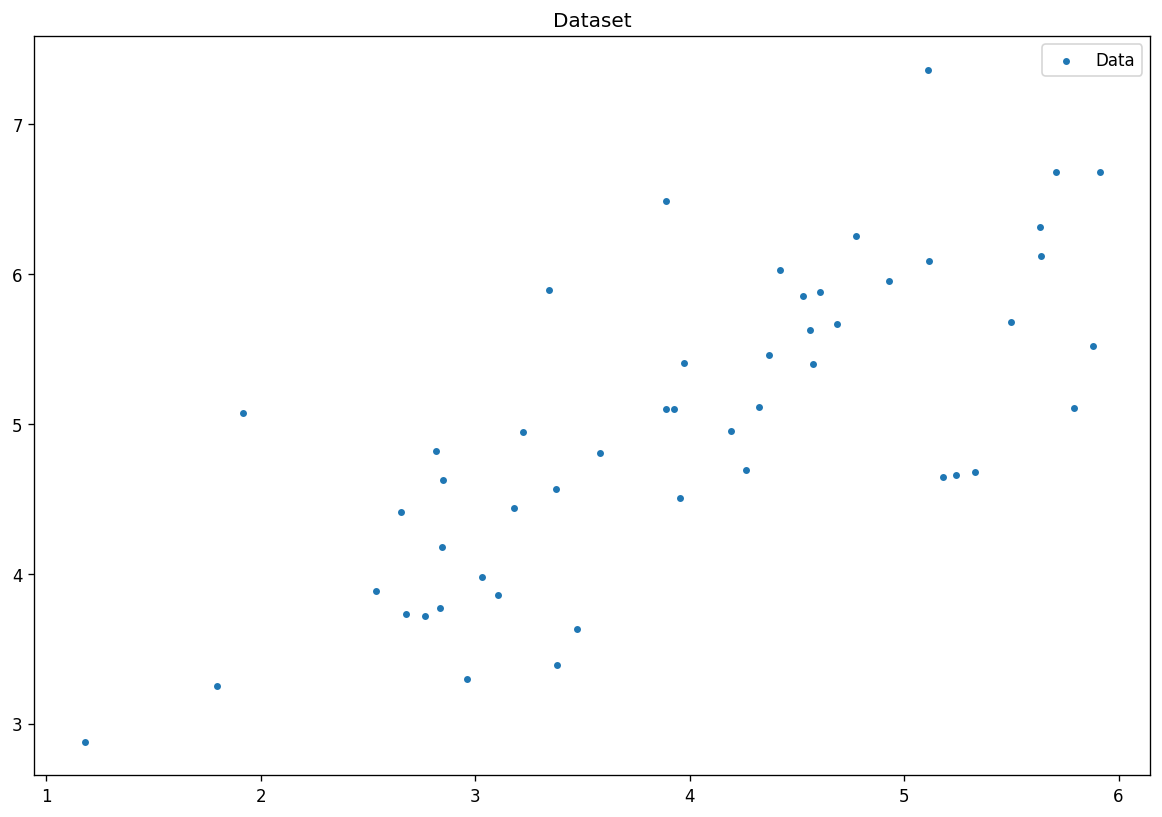

In [3]:
plt.figure(figsize=fig_size,dpi=fig_dpi)
plt.scatter(x[:,0],x[:,1],s=10, label="Data")
plt.title("Dataset")
plt.legend(loc="best")
plt.show()

In [15]:
from PCA import PCA
m_pca = PCA(1)
m_pca.fit(x)
x_reduced = m_pca.transform(x)
print("The principal axes of components is: {}\n"
      "The variance of each components is: {}\n"
      "The variance ratio of selected components is: {}"
      .format(m_pca.components_.tolist(), m_pca.explained_variance_.tolist(), m_pca.explained_variance_ratio_.tolist()))

The principal axes of components is: [[-0.7690815341368202], [-0.6391506816469459]]
The variance of each components is: [2.1098781795840327]
The variance ratio of selected components is: [0.8706238489732337]


In [14]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(x)
print("The principal axes of components is: {}\n"
      "The variance of each components is: {}\n"
      "The variance ratio of selected components is: {}"
      .format(pca.components_.tolist(), pca.explained_variance_.tolist(), pca.explained_variance_ratio_.tolist()))

The principal axes of components is: [[-0.7690815341368203, -0.6391506816469453], [-0.6391506816469453, 0.7690815341368203]]
The variance of each components is: [2.109878179584032, 0.31353140432790366]
The variance ratio of selected components is: [0.8706238489732335, 0.1293761510267664]


$XP=X_{reduced}$
$XPP^{\top}=X_{reduced}P^{\top}=X$
因为P是正交的，所以$PP^{T}=I$

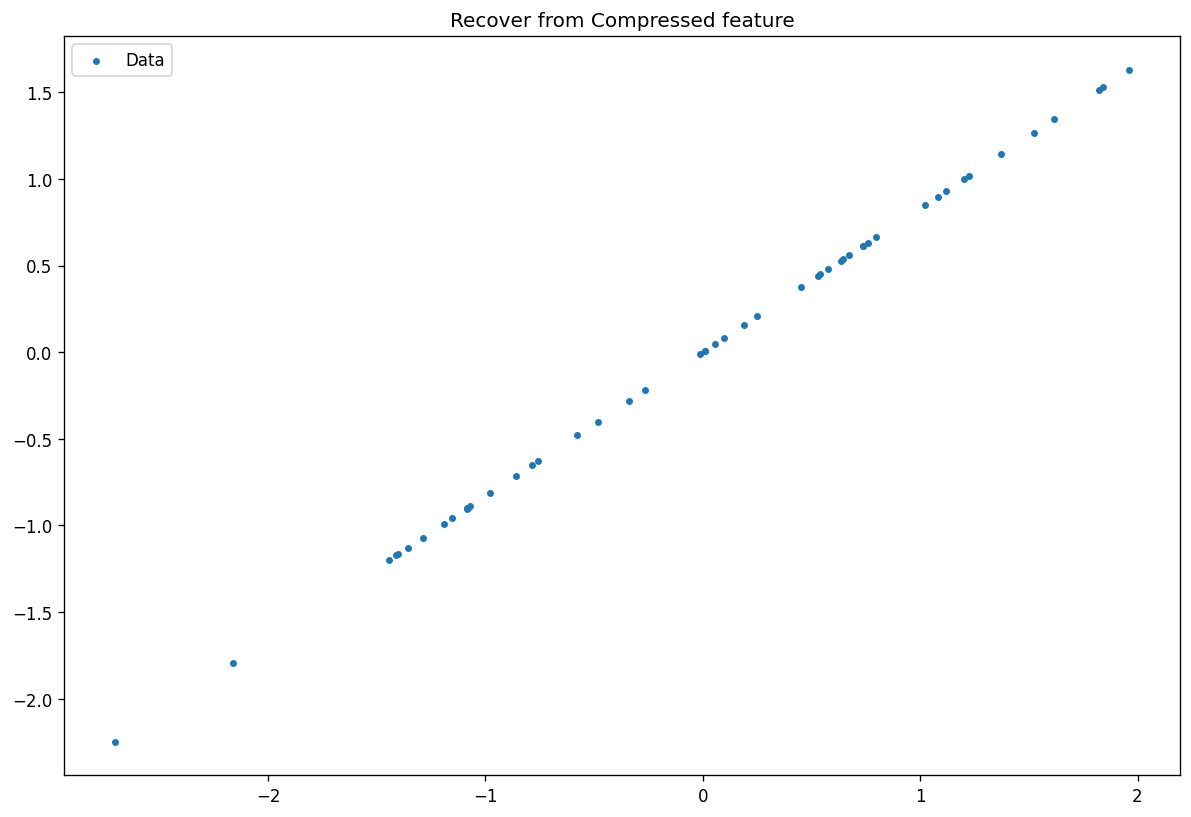

In [16]:
plt.figure(figsize=fig_size, dpi=fig_dpi)
m_x_recovered = x_reduced @ m_pca.components_.T
plt.scatter(m_x_recovered[:,0],m_x_recovered[:,1],s=10,label="Data")
plt.legend(loc="best")
plt.title("Recover from Compressed feature")
plt.show()

In [7]:
faces = loadmat('data/ex7faces.mat')
face_x = faces['X']
face_x.shape

(5000, 1024)

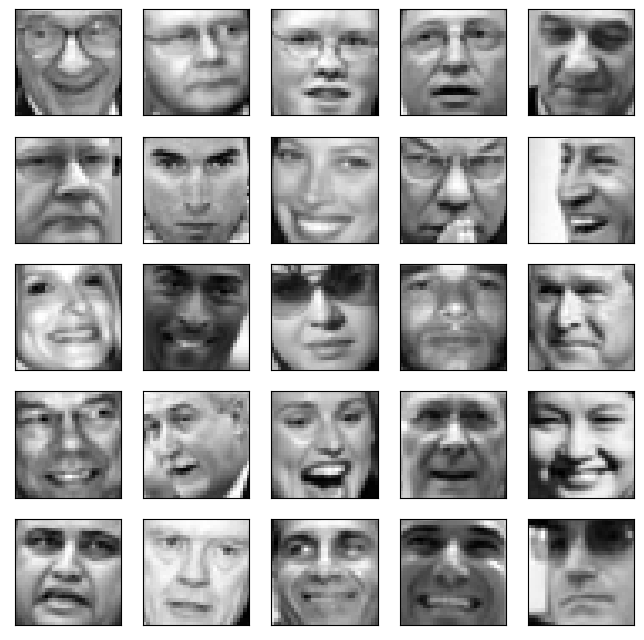

In [8]:
def plot_images(x):
    pic_size = int(np.sqrt(x.shape[1]))
    grid_size = 5

    first_n_images = x[:25, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)).T, cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

plot_images(face_x)

In [9]:
from PCA import PCA
face_pca = PCA(n_components=100)
face_pca.fit(face_x)
face_r = face_pca.transform(face_x)
face_r

array([[ 6.21322098e+02,  2.42665047e+02,  3.05440520e+02, ...,
        -1.79509212e+01, -3.35679370e+00, -2.22180912e+01],
       [ 3.77789683e+02, -1.34585967e+02,  2.64798397e+02, ...,
        -2.02599854e+01,  1.81329502e+01,  6.88280173e+00],
       [-3.01869483e+02, -2.51170219e+02,  1.34635986e+02, ...,
        -2.74753660e+01,  4.81768804e+01, -1.44463998e+01],
       ...,
       [ 5.55219280e+02,  4.96830239e+02, -8.10527686e+02, ...,
        -3.02992269e+01,  2.32501062e+01, -5.43802674e+01],
       [ 1.41935818e+03, -1.29440670e+02, -9.54426008e+01, ...,
        -1.17387442e+01, -3.28761386e+00, -7.96367472e-01],
       [ 4.32873431e+02,  1.11711554e+02, -2.20775709e+02, ...,
        -4.79468203e+01, -8.26927068e+00,  3.08698450e+01]])

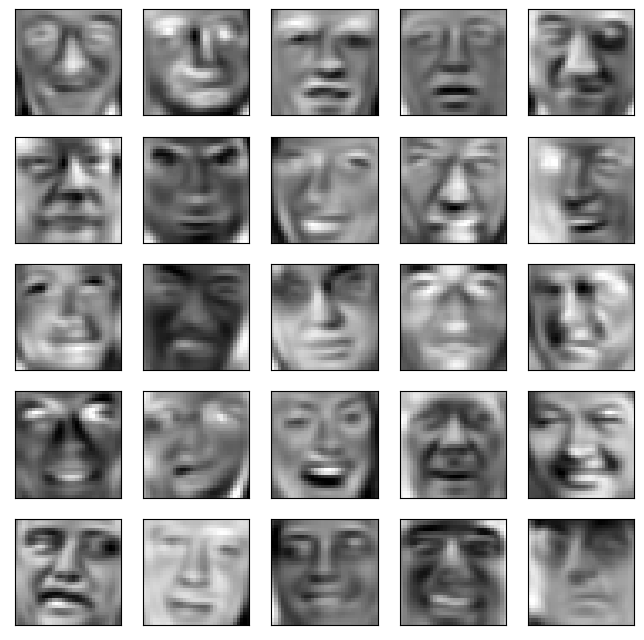

In [10]:
face_recover = face_r @ face_pca.components_.T
plot_images(face_recover)